In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

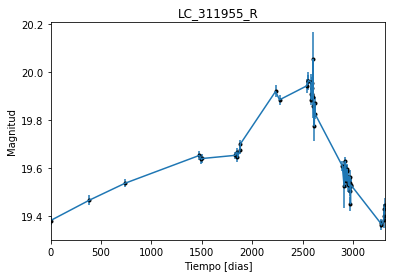

In [2]:
data = np.genfromtxt('LC_311955_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311955_R')
plt.savefig("LC_311955_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

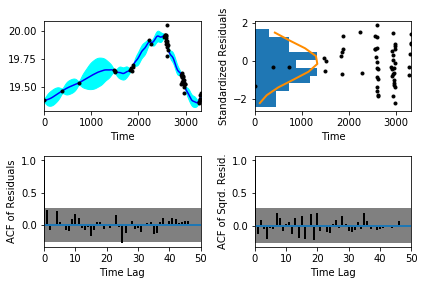

In [5]:
sample.assess_fit()

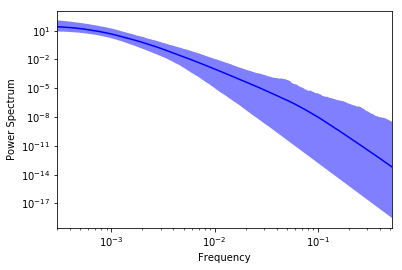

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

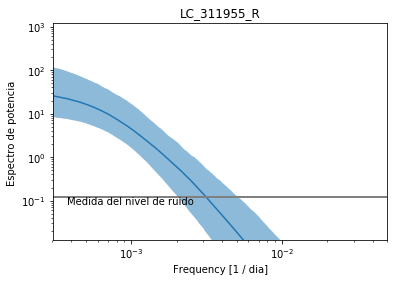

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311955_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311955_R')

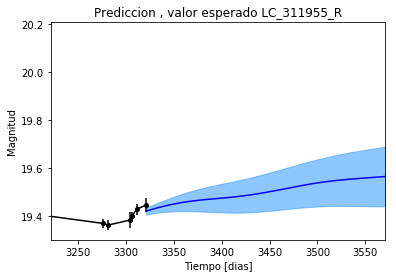

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311955_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311955_R')

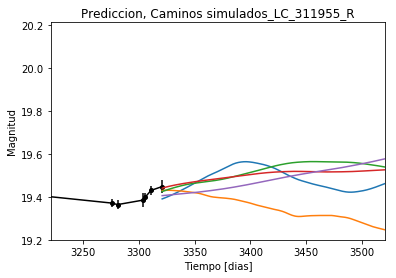

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311955_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


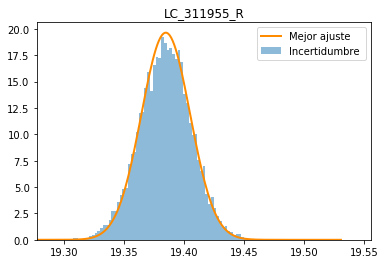

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311955_R')
plt.savefig("Mejor_ajuste_LC_311955_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311955_R')

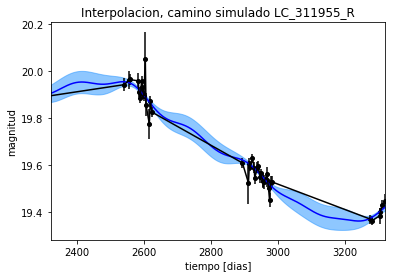

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_R')

Text(0.5,1,'Interpolacion, camino simulado LC_311955_R')

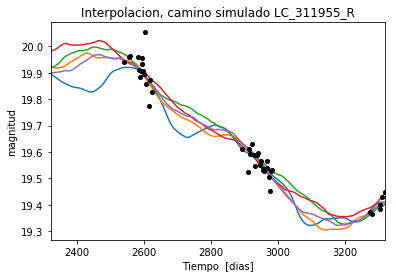

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 3480.35976086
Median: 0.0106407220181
Standard deviation: 0.195221581765
68% credibility interval: [ 0.00086558  0.18116833]
95% credibility interval: [  3.62602260e-04   7.61960454e-01]
99% credibility interval: [  3.11451122e-04   9.84673124e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 614.273506888
Median: 0.00127802996297
Standard deviation: 0.0773441138265
68% credibility interval: [ 0.00044297  0.01601843]
95% credibility interval: [ 0.00031689  0.19812901]
99% credibility interval: [  3.05076927e-04   6.16664263e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 301.218506724
Median: 0.00361255412867
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1610.22582475
Median: 120.250194795
Standard deviation: 1.54464725425
68% credibility interval: [ 118.53979159  121.32016562]
95% credibility interval: [ 116.0350579   121.93316377]
99% credibility interval: [ 114.13535363  122.27787543]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 441.38440983
Median: 0.410739378138
Standard deviation: 1.92584358929
68% credibility interval: [ 0.03241268  3.13302365]
95% credibility interval: [ 0.01220954  6.37347284]
99% credibility interval: [  9.04848500e-03   9.51295740e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 847.520493591
Median: 0.198962294816
Standard deviation: 7.52834408706
68% credibility interval: [ 0.00746231  4.12015892]
95% credibility interval: [  4.16

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0975908
Median: 2.18637582684e-31
Standard deviation: 2.71439312009e+63
68% credibility interval: [  2.03435845e-77   1.03130498e-05]
95% credibility interval: [  2.22710157e-117   1.62751295e+001]
99% credibility interval: [  2.91365854e-128   1.54423080e+061]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2454.42162015
Median: 19.5944155132
Standard deviation: 0.116363523929
68% credibility interval: [ 19.4950527   19.69232343]
95% credibility interval: [ 19.35211253  19.81872274]
99% credibility interval: [ 19.24006422  19.94072261]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 296.50087722
Median: 0.00153836990451
Standard deviation: 0.21584314869
68% credibility interval: [ 0.          0.24113331]
95% credibility interval: [ 0.          0.83151362]
99% credibility interval: [ 0.          1.00260208]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 296.50087722
Median: 0.00153836990451
Standard deviation: 0.21584314869
68% credibility interval: [ 0.          0.24113331]
95% credibility interval: [ 0.          0.83151362]
99% credibility interval: [ 0.          1.00260208]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1435.94193184
Median: 0.0
Standard deviation: 0.000223475689359
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1610.22582475
Median: 120.250194795
Standard deviation: 1.54464725425
68% credibility interval: [ 118.53979159  121.32016562]
95% credibility interval: [ 116.0350579   121.93316377]
99% credibility interval: [ 114.13535363  122.27787543]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1292.63713796
Median: 0.0436955804974
Standard deviation: 0.0500042258015
68% credibility interval: [ 0.02617451  0.08364031]
95% credibility interval: [ 0.01701824  0.17704466]
99% credibility interval: [ 0.01320333  0.31502973]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2561.71876681
Median: 1.0164242008
Standard deviation: 0.162884320831
68% credibility interval: [ 0.87310461  1.18494503]
95% credibility interval: [ 0.7563315   1.39357153]
99% credibility interval: [ 0.69365559  1.55210198]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 6048.23913114
Median: 2.97622982098e-05
Standard deviation: 0.00521946733023
68% credibility interval: [  9.02365114e-07   7.01574908e-04]
95% credibility interval: [  2.24433182e-08   5.00485393e-03]
99% credibility interval: [  3.86591399e-67   1.13886105e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 3480.35976086
Median: (-0.0668576282421+0j)
Standard deviation: 1.82860912838
68% credibility interval: [-1.13831418+0.j         -0.00543859-0.03302504j]
95% credibility interval: [ -4.78753873e+00+0.j          -2.27829719e-03-0.00388642j]
99% credibility interval: [ -6.18688371e+00+0.j          -1.95690512e-03-1.10956137j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 614.273506888
Median: (-0.00803009908549+0.52950211868j)
Standard deviation: 1.44062322907
68% credibility interval: [-0.10064678+4.21110742j -0.00278328+0.04359116j]
95% credibility interval: [-1.24488131+4.76313986j -0.00199109+0.j        ]
99% credibility interval: [ -3.87461584e+00+1.59879365j  -1.91685487e-03+0.0017099j ]
Posterior summary for par